In [1]:
import sys
sys.path.append(r"E:\FeatureAgeNet")

In [21]:
import torch

In [99]:
from utils.GaborCNN import GaborConv2d, GaborExConv2d

In [4]:
from feature_test import get_input

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("E:/Dataset/morph2-224.csv")

In [8]:
sample = df[df.age == 20].sample(2)
sample

,path,gender,age,label
37666,290202_08M20.jpg,1,20,4
49485,334545_00M20.jpg,1,20,4


In [95]:
x = get_input("E:/Dataset/morph2-224/" + sample.path.values[0])

In [92]:
x = get_input("E:/Dataset/morph2-224/009055_1M54.jpg")

e:\FeatureAgeNet\analyse\feature_test.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float)


In [111]:
model = GaborConv2d(3, 4, 7, 2, 3, bias=False)
model = model.cuda()

In [107]:
model5 = GaborExConv2d(3, 4, 7, 2, 3)
# model5 = model5.cuda()

In [62]:
model2 = torch.nn.Sequential(
    GaborConv2d(3, 4, 7, 2, 3),
    torch.nn.BatchNorm2d(4),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(3, 2, 1)
)
model2 = model2.cuda()

In [113]:
y = model(x)

In [20]:
out = y.cpu().detach().numpy()
out.shape

(1, 4, 112, 112)

In [102]:
model1 = torch.nn.Conv2d(3, 64, 7, 2, 3, bias=False)
model1 = model1.cuda()

In [67]:
model3 = torch.nn.Sequential(
    torch.nn.Conv2d(3, 64, 7, 2, 3, bias=False),
    torch.nn.BatchNorm2d(64),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(3, 2, 1)
)
model3 = model3.cuda()

In [23]:
y1 = model1(x)
y1.shape

torch.Size([1, 64, 112, 112])

In [63]:
y2 = model2(x)

In [68]:
y3 = model3(x)

In [30]:
o = out.squeeze()
o.shape

(4, 112, 112)

In [32]:
o1 = o.transpose(1,2,0)

In [35]:
o1 = o1*255

In [38]:
o1[:,:,0].shape

(112, 112)

In [39]:
from matplotlib import pyplot as plt

In [117]:
import numpy as np

In [118]:
np.max(y.cpu().data.numpy()[0,0,:,:], axis=0)

array([0.1418989 , 0.2517571 , 0.30245915, 0.35461098, 0.2842464 ,
       0.24533972, 0.22822534, 0.22286837, 0.23196113, 0.22973473,
       0.22366825, 0.21451673, 0.23042989, 0.20709433, 0.14280538,
       0.07551268, 0.0754839 , 0.09080342, 0.07878267, 0.10832851,
       0.12893356, 0.20178863, 0.18242404, 0.23992087, 0.29261708,
       0.31316018, 0.41316223, 0.35852167, 0.39994362, 0.45532843,
       0.36736798, 0.38668665, 0.33908734, 0.4202477 , 0.3836008 ,
       0.27131918, 0.15295765, 0.14857084, 0.13784103, 0.19186097,
       0.16320254, 0.18263699, 0.14596911, 0.2805238 , 0.30513918,
       0.26898438, 0.28256264, 0.2959945 , 0.2570004 , 0.20585926,
       0.18393074, 0.16668814, 0.18172699, 0.17736894, 0.17308582,
       0.13808845, 0.19346786, 0.1998929 , 0.18747616, 0.21811613,
       0.2088524 , 0.1731025 , 0.1540177 , 0.15227398, 0.18965583,
       0.23360528, 0.21420091, 0.17827784, 0.1700542 , 0.16150175,
       0.17108597, 0.18283772, 0.1868103 , 0.28569025, 0.37379

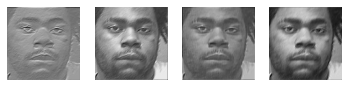

In [114]:
# 特征输出可视化
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    plt.imshow(y.cpu().data.numpy()[0,i,:,:],cmap='binary')
# plt.savefig("GCN输出3.jpg", dpi=400, bbox_inches='tight')
plt.show()

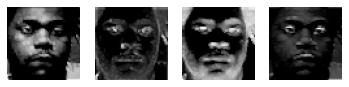

In [66]:
# 特征输出可视化
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    plt.imshow(y2.cpu().data.numpy()[0,i,:,:],cmap='gray')
# plt.savefig("GCN输出.jpg", dpi=400, bbox_inches='tight')
plt.show()

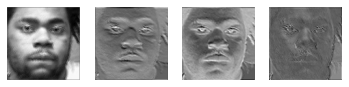

In [91]:
# plt.figure(figsize=(10,4))
# 特征输出可视化
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    plt.imshow(y1.cpu().data.numpy()[0,i,:,:],cmap='binary')
plt.savefig("CNN输出2.jpg", dpi=400, bbox_inches='tight')
plt.show()

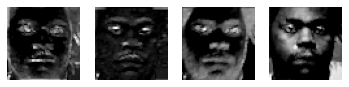

In [77]:
# plt.figure(figsize=(10,4))
# 特征输出可视化
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    plt.imshow(y3.cpu().data.numpy()[0,i,:,:],cmap='gray')
# plt.savefig("CNN输出.jpg", dpi=400, bbox_inches='tight')
plt.show()

In [108]:
y5 = model5(x.clone().cpu())

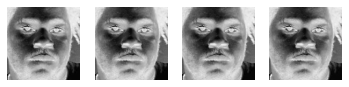

In [109]:
# 特征输出可视化
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    plt.imshow(y5.cpu().data.numpy()[0,i,:,:],cmap='binary')
# plt.savefig("GCN输出3.jpg", dpi=400, bbox_inches='tight')
plt.show()

In [120]:
from pytorch_wavelets import ScatLayer

In [122]:
model9 = ScatLayer()
model9 = model9.cuda()

In [123]:
y9 = model9(x)

In [126]:
y9.shape

torch.Size([1, 21, 112, 112])

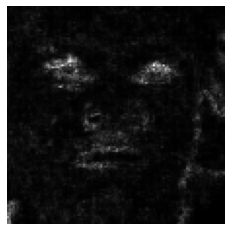

In [168]:
# 特征输出可视化 21
q = np.zeros_like(y9.cpu().data.numpy()[0,0,:,:])
for i in y9.cpu().data.numpy()[0,3:,:,:]:
    q += i
plt.imshow(q,cmap='gray')
plt.axis("off")
# plt.savefig("WCN输出.jpg", dpi=400, bbox_inches='tight')
plt.show()

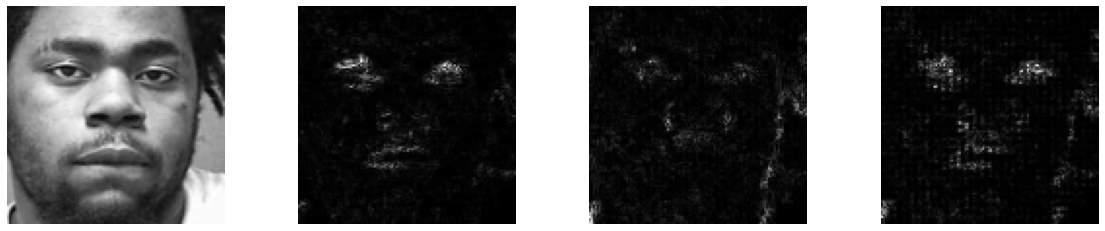

In [164]:
plt.figure(figsize=(20,4))
# 特征输出可视化 21
idx = 0
for i in [0,1,3,5]:
    ax = plt.subplot(1, 4, idx + 1)
    idx += 1
    # ax.set_title('layer {}'.format(i+1))
    ax.axis('off')
    q = y9.cpu().data.numpy()[0,i*3,:,:] + y9.cpu().data.numpy()[0,3*i+1,:,:] + y9.cpu().data.numpy()[0,3*i+2,:,:]
    plt.imshow(q,cmap='gray')
# plt.savefig("WCN输出.jpg", dpi=400, bbox_inches='tight')
plt.show()

In [139]:
 temp = y9.cpu().data.numpy()[0,20,:,:]

In [147]:
temp*255

array([[ 8.217335  , 10.542937  , 12.594547  , ...,  0.14144646,
         3.1076841 ,  7.199133  ],
       [ 5.8956275 , 13.673226  , 20.344149  , ...,  0.4726457 ,
         3.6239882 ,  8.068382  ],
       [ 2.5476935 , 16.644783  , 16.34604   , ...,  1.9366701 ,
         0.9738405 ,  0.8643263 ],
       ...,
       [ 7.1344285 ,  5.7258925 ,  3.0571108 , ...,  0.        ,
         0.        ,  0.        ],
       [11.447978  ,  4.0738997 ,  0.5902627 , ...,  0.        ,
         0.        ,  0.        ],
       [18.926222  ,  2.7414916 ,  0.03887168, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [141]:
temp.max()

1.3445653

In [145]:
y9.cpu().data.numpy()[0,3,:,:].min()

0.0